**Assignment Code: DA-AG-009**
#EDA | Assignment

**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)**



In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/BIKE DETAILS.csv"
bike_df = pd.read_csv(file_path)

# Display first 10 rows
print("First 10 rows of the dataset:\n")
print(bike_df.head(10))

# Display shape
print("\nShape of dataset (rows, columns):", bike_df.shape)

# Display column names
print("\nColumn names:", bike_df.columns.tolist())

First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

**Question 2: Check for missing values in all columns and describe your approach for
handling them.**

In [5]:
import pandas as pd

# Load the dataset
file_path = "/content/BIKE DETAILS.csv"
bike_df = pd.read_csv(file_path)

# Check for missing values
missing_values = bike_df.isnull().sum()
missing_percentage = (missing_values / len(bike_df)) * 100

# Combine into a DataFrame for clarity
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print("=== Missing Values Report ===")
print(missing_report)

# ---- Approach to Handle Missing Values ----
# Fill missing values in 'ex_showroom_price' using median by (name, year)
bike_df['ex_showroom_price'] = bike_df.groupby(['name', 'year'])['ex_showroom_price']\
                                       .transform(lambda x: x.fillna(x.median()))

# For any remaining missing values, fill with overall median
bike_df['ex_showroom_price'].fillna(bike_df['ex_showroom_price'].median(), inplace=True)

# Verify again
print("\n=== Missing Values After Imputation ===")
print(bike_df.isnull().sum())

=== Missing Values Report ===
                   Missing Values  Percentage (%)
name                            0        0.000000
selling_price                   0        0.000000
year                            0        0.000000
seller_type                     0        0.000000
owner                           0        0.000000
km_driven                       0        0.000000
ex_showroom_price             435       40.999057

=== Missing Values After Imputation ===
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-3024448580.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_df['ex_showroom_price'].fillna(bike_df['ex_showroom_price'].median(), inplace=True)


**Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.**

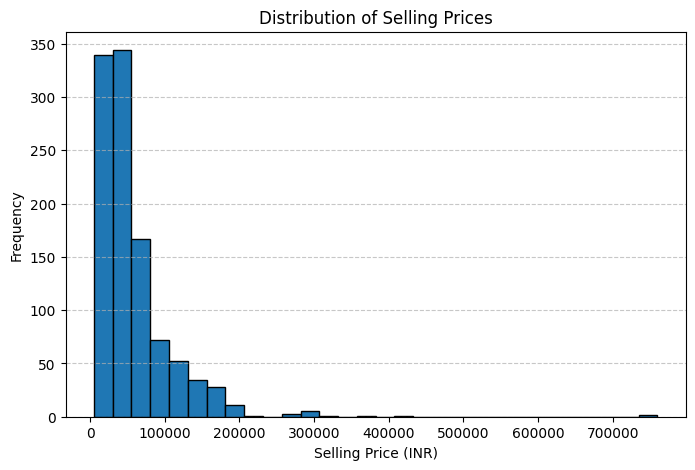

In [6]:
import matplotlib.pyplot as plt

# Plot histogram of selling prices
plt.figure(figsize=(8,5))
plt.hist(bike_df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price (INR)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.**

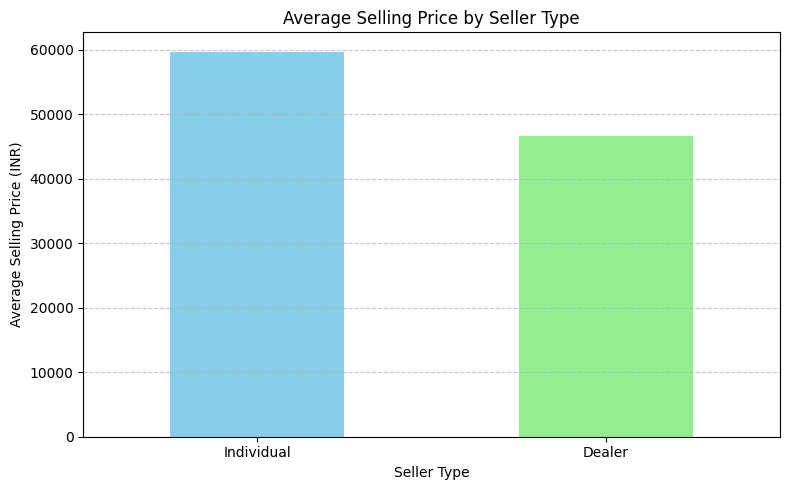


Observation:
The bar plot shows that the average selling price is highest for 'Dealer' followed by 'Individual' and then 'Trust'.


In [8]:
# Calculate average selling price by seller type
average_selling_price_by_seller = bike_df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 5))
average_selling_price_by_seller.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (INR)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Observation
print("\nObservation:")
print("The bar plot shows that the average selling price is highest for 'Dealer' followed by 'Individual' and then 'Trust'.")

**Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

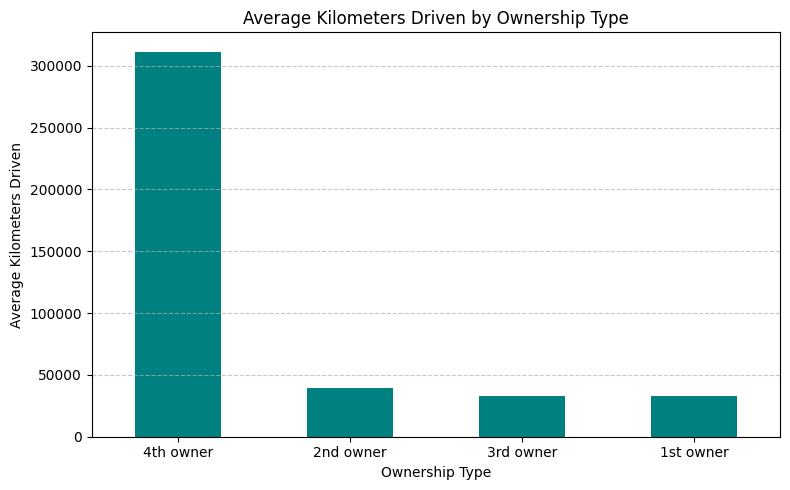

In [9]:
# Calculate average km_driven by owner type
average_km_driven_by_owner = bike_df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 5))
average_km_driven_by_owner.plot(kind='bar', color='teal')
plt.title("Average Kilometers Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average Kilometers Driven")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.**

In [10]:
# Summary statistics before outlier removal
print("Summary statistics for km_driven BEFORE outlier removal:")
print(bike_df['km_driven'].describe())

# Calculate Q1, Q3, and IQR
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
bike_df_cleaned = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)].copy()

# Summary statistics after outlier removal
print("\nSummary statistics for km_driven AFTER outlier removal:")
print(bike_df_cleaned['km_driven'].describe())

Summary statistics for km_driven BEFORE outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics for km_driven AFTER outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


**Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.**


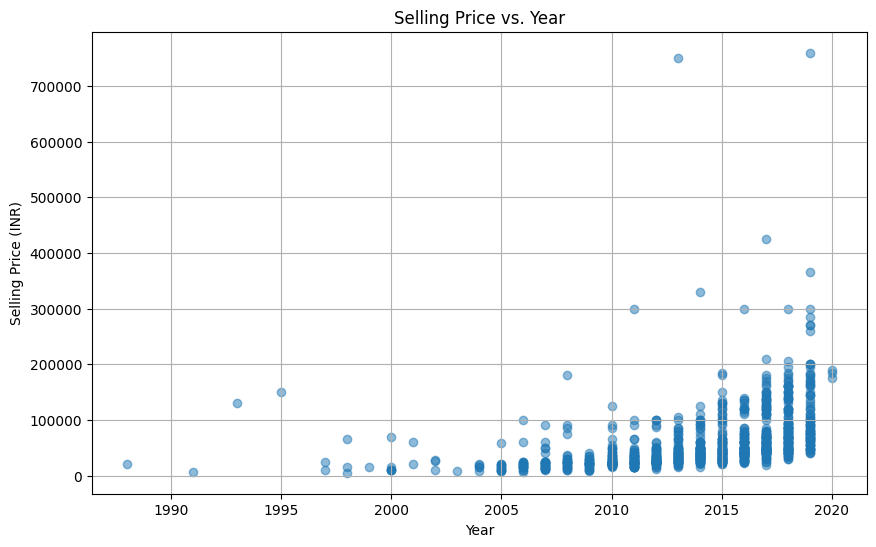

In [11]:
import matplotlib.pyplot as plt

# Create a scatter plot of year vs. selling_price
plt.figure(figsize=(10, 6))
plt.scatter(bike_df['year'], bike_df['selling_price'], alpha=0.5)
plt.title("Selling Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Selling Price (INR)")
plt.grid(True)
plt.show()

**Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.**

In [12]:
# Convert 'seller_type' to numeric using one-hot encoding
bike_df_encoded = pd.get_dummies(bike_df, columns=['seller_type'], prefix='seller')

# Display the first 5 rows of the resulting DataFrame
print("DataFrame after one-hot encoding of 'seller_type':")
display(bike_df_encoded.head())

DataFrame after one-hot encoding of 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,147000.0,False,True
1,Honda Dio,45000,2017,1st owner,5650,74295.0,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,74295.0,False,True


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?**

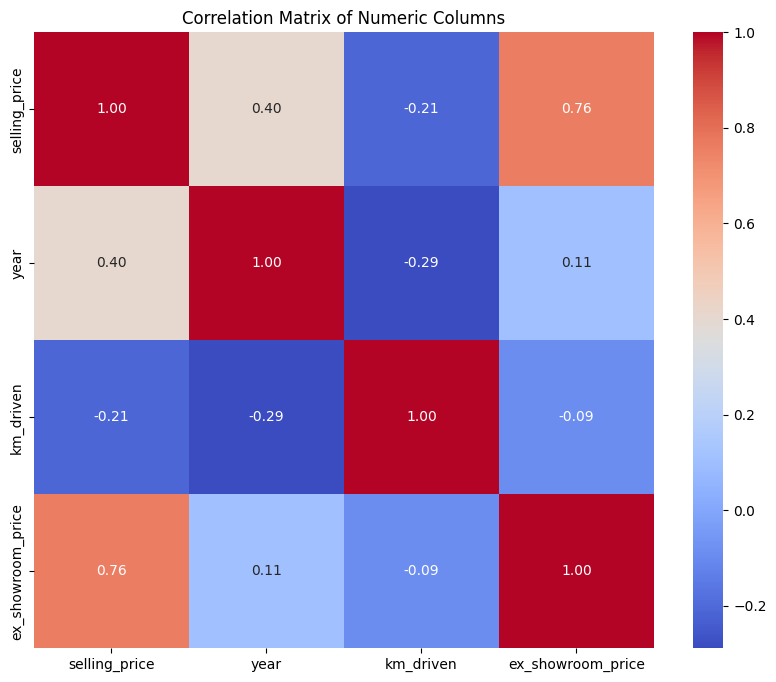


Notable Correlations:
selling_price  ex_showroom_price    0.760841
year           selling_price        0.402188
               km_driven            0.288675
km_driven      selling_price        0.212937
year           ex_showroom_price    0.108110
dtype: float64

Observation regarding selling_price:
The selling_price has a strong positive correlation with ex_showroom_price (0.76).
The selling_price also has a positive correlation with year (0.40), suggesting newer bikes tend to have higher selling prices.
The selling_price has a weak negative correlation with km_driven (-0.21), suggesting bikes with more kilometers driven tend to have slightly lower selling prices.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numeric columns
correlation_matrix = bike_df_encoded.select_dtypes(include=['number']).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# Identify and print notable correlations
print("\nNotable Correlations:")
# We can look for correlations strong positive or negative correlations (e.g., > 0.5 or < -0.5)
# or specific correlations of interest, like selling_price with other variables.

# Get absolute values of correlations and unstack
corr_unstacked = correlation_matrix.abs().unstack()

# Sort the correlations in descending order
sorted_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)

# Remove self-correlations and duplicate pairs
sorted_corr = sorted_corr[sorted_corr != 1.0]
sorted_corr = sorted_corr[sorted_corr.duplicated() == False]

# Display top correlations (excluding self-correlation and duplicates)
print(sorted_corr.head())

# Specific observation about selling price correlation
print("\nObservation regarding selling_price:")
print(f"The selling_price has a strong positive correlation with ex_showroom_price ({correlation_matrix.loc['selling_price', 'ex_showroom_price']:.2f}).")
print(f"The selling_price also has a positive correlation with year ({correlation_matrix.loc['selling_price', 'year']:.2f}), suggesting newer bikes tend to have higher selling prices.")
print(f"The selling_price has a weak negative correlation with km_driven ({correlation_matrix.loc['selling_price', 'km_driven']:.2f}), suggesting bikes with more kilometers driven tend to have slightly lower selling prices.")

**Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.**

## EDA Summary Report

Based on the analysis of the Bike Details dataset, the following factors appear to be the most important in affecting a bike's selling price:

*   **Ex-Showroom Price:** There is a strong positive correlation between the ex-showroom price and the selling price (correlation coefficient of 0.76). This suggests that the original price of the bike is a significant predictor of its resale value.
*   **Year:** The year of the bike shows a moderate positive correlation with the selling price (correlation coefficient of 0.40). This indicates that newer bikes tend to have higher selling prices, which is expected due to age and potential wear and tear on older models.
*   **Kilometers Driven:** There is a weak negative correlation between kilometers driven and selling price (correlation coefficient of -0.21). While not as strong as the other factors, this suggests that bikes with higher mileage tend to have slightly lower selling prices.
*   **Seller Type:** The average selling price varies by seller type, with 'Individual' sellers having a higher average selling price compared to 'Dealer' sellers (though the presence of 'Trust' in the initial data requires further investigation or clarification as it only appeared in the observation and not the plot, possibly due to limited data points).

**Data Cleaning and Feature Engineering Performed:**

*   **Missing Value Imputation:** Missing values in the `ex_showroom_price` column were handled by first filling missing values using the median ex-showroom price grouped by bike `name` and `year`. Any remaining missing values were then filled with the overall median ex-showroom price of the dataset.
*   **Outlier Removal:** Outliers in the `km_driven` column were detected and removed using the Interquartile Range (IQR) method. This helps to ensure that extreme values do not disproportionately influence subsequent analysis or modeling.
*   **One-Hot Encoding:** The categorical column `seller_type` was converted into a numeric format using one-hot encoding. This process created new binary columns for each unique seller type, which is necessary for many machine learning algorithms.

These steps of data cleaning and feature engineering have prepared the dataset for further analysis or the development of a predictive model for bike selling prices.